In [59]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

df = pd.read_csv("annonimized.csv")  # ví dụ: "data.csv"
ck=pd.read_csv("ck-public.csv")
df.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [60]:
df.rename(columns={
    "concat('it001',`assignment_id`)": 'assignment_id',
    "concat('it001',`problem_id`)": 'problem_id',
    "concat('it001', username)": 'username',
    "concat('it001',`language_id`)":'language'
}, inplace=True)
ck.rename(columns={
    "hash": "username",
}, inplace=True)
df.head()

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   assignment_id  295198 non-null  object
 1   problem_id     295198 non-null  object
 2   username       295198 non-null  object
 3   is_final       295198 non-null  int64 
 4   status         295198 non-null  object
 5   pre_score      295198 non-null  int64 
 6   coefficient    295198 non-null  int64 
 7   language       295198 non-null  object
 8   created_at     295198 non-null  object
 9   updated_at     295198 non-null  object
 10  judgement      295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [88]:
# Tổng hợp đặc trưng theo từng sinh viên (username)
grouped = df.groupby("username")

# Đặc trưng cơ bản
features = grouped.agg(
    submission_count=("problem_id", "count"),
    problem_count=("problem_id", "nunique"),
    assignment_count=("assignment_id", "nunique"),
    total_pre_score=("pre_score", "sum"),
    total_final_pre_score=("pre_score", lambda x: x[df.loc[x.index, "is_final"] == 1].sum())
)

# Tính tổng điểm cao nhất theo mỗi problem_id của mỗi sinh viên
max_score_per_problem = df.groupby(["username", "problem_id"])["pre_score"].max().reset_index()
sum_max_score = max_score_per_problem.groupby("username")["pre_score"].sum().rename("sum_max_score_per_problem")

# Gộp lại tất cả đặc trưng
features = features.join(sum_max_score, on="username")
features = features.reset_index()
features 

,username,submission_count,problem_count,assignment_count,total_pre_score,total_final_pre_score,sum_max_score_per_problem
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,809110,460000,460000
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,1421535,752499,752499
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,1164882,629214,615300
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,4,595276,470000,470000
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,692766,605626,465626
...,...,...,...,...,...,...,...
1484,feb8a2859a011c59efd22ed419cb69288fe03627,74,34,9,413000,340000,340000
1485,fef4a3263ed9a8ab14d457694bb8fd86ccd98312,260,77,6,1613185,759000,749000
1486,ff12d6e2ab80696ed8e22fbe5497e96c68d29076,437,100,6,2184330,1024230,994230
1487,ff3fa2ec64294f37ae968159f810ebeda7966c51,94,34,7,408273,313823,313823


In [44]:
ck.columns.tolist()

['username', 'CK']

In [45]:
df_merged = pd.merge(features,ck, on="username", how="inner")
df_merged

,username,submission_count,problem_count,assignment_count,total_pre_score,total_final_pre_score,sum_max_score_per_problem,CK
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,809110,460000,460000,5.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,1421535,752499,752499,6.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,1164882,629214,615300,4.5
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,692766,605626,465626,5.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,90,9,1042765,796000,796000,4.0
...,...,...,...,...,...,...,...,...
756,840d07858c03f80f4695056e2cc7d0c474b83a25,111,43,6,574052,414000,414000,5.5
757,844f5db2e7e31ae51eba025480679ed7e4708ac6,357,104,17,1708325,1031846,1031846,6.0
758,845acd04a77b3d1b623f255d9f9f8eae90892dab,155,52,8,658331,480666,474000,6.0
759,8460eaaf887a6289fb156f7562fb739ba8e9629e,557,114,12,2383183,1106000,1106000,7.0


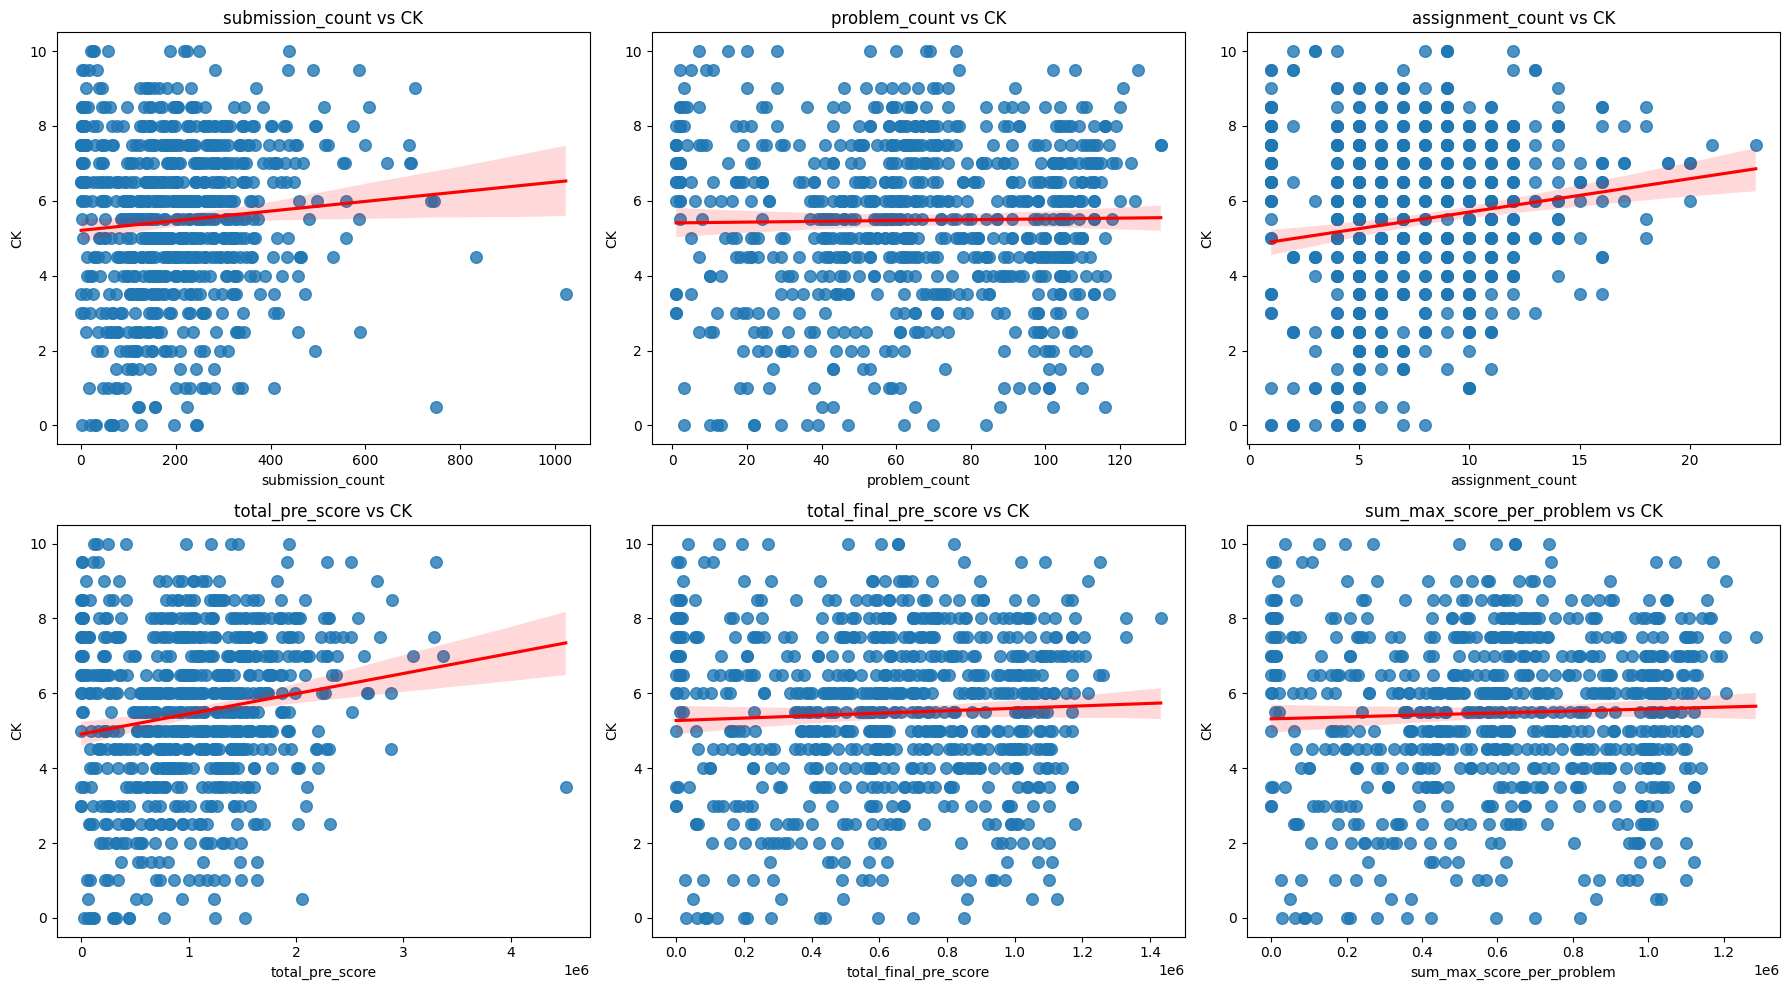

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dữ liệu dán thủ công (có thể mở rộng thêm dòng nếu muốn)


df = pd.DataFrame(df_merged)

# Vẽ biểu đồ scatter từng feature so với CK
features = [
    "submission_count", "problem_count", "assignment_count",
    "total_pre_score", "total_final_pre_score", "sum_max_score_per_problem"
]

plt.figure(figsize=(18, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=feature, y="CK", data=df, scatter_kws={'s': 70}, line_kws={'color': 'red'})
    plt.title(f"{feature} vs CK")
    plt.xlabel(feature)
    plt.ylabel("CK")
plt.tight_layout()
plt.show()


In [101]:
# 1. Xoá các dòng thiếu điểm CK
df_merged = df_merged.dropna(subset=["CK"])

# 2. Chia X, y
X = df_merged.drop(columns=["CK", "username",])
y = df_merged["CK"]

# 3. Chia tập train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🔄 4. Scale dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Huấn luyện Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

# 6. Dự đoán và đánh giá
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test_scaled)
print("📊 MAE:", mean_absolute_error(y_test, y_pred))
print("📈 R²:", r2_score(y_test, y_pred))


📊 MAE: 1.4735451024814585
📈 R²: 0.1292131133113683


In [102]:

features.columns.tolist()

['username',
 'submission_count',
 'problem_count',
 'assignment_count',
 'total_pre_score',
 'total_final_pre_score',
 'sum_max_score_per_problem',
 'CK']

In [103]:
# Đảm bảo không có cột dư thừa (CK hoặc index)
features = features.reset_index() if features.index.name == "username" else features.copy()
features = features.drop(columns=[col for col in ["index", "CK"] if col in features.columns])

# Scale đúng các cột đặc trưng ban đầu
X_new = features.drop(columns=["username"])
X_new_scaled = scaler.transform(X_new)

# Dự đoán
features["CK"] = model.predict(X_new_scaled).round(1)

# Xuất ra file
features[["username", "CK"]].to_csv("du_doan_diem_ck.csv", index=False)
print("✅ Đã ghi file 'du_doan_diem_ck.csv'")



✅ Đã ghi file 'du_doan_diem_ck.csv'
